In [1]:
from __future__ import division
import matplotlib.pyplot as plt
import netCDF4 as nc
import numpy as np
from salishsea_tools import nc_tools
from salishsea_tools import tidetools
%matplotlib inline

In [2]:
# read in old bathymetry
nc_filepath1 = '../../NEMO-forcing/grid/bathy_meter_SalishSea6.nc'
old_bathy = nc.Dataset(nc_filepath1, 'r')
old_depth = old_bathy.variables['Bathymetry']
print old_depth[416, 335]

13.125


[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.]


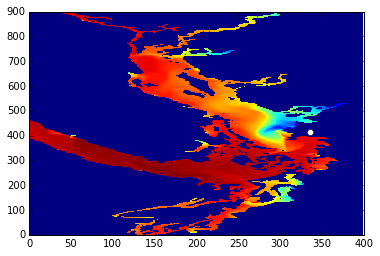

In [3]:
# read in old TS, this also gives the depths of the cells
nc_filepath2 = '../../NEMO-forcing/initial_strat/TSApri.nc'
TS = nc.Dataset(nc_filepath2, 'r')
old_salinity = TS.variables['vosaline'][0]
old_temperature = TS.variables['votemper'][0]
# TSApri is a badly formed file, with no depth or nav_lat or nav_lon data
print old_salinity[:, 416, 335]
plt.pcolormesh(old_salinity[0])
plt.plot(335, 416, 'ow')

In [4]:
# Read another file just to get that
nc_filepathE = '/results/SalishSea/nowcast/17dec15/SalishSea_04008960_restart.nc'
TS_supp = nc.Dataset(nc_filepathE, 'r')
print TS_supp
depths = TS_supp.variables['nav_lev'][:]
lat = TS_supp.variables['nav_lat'][:]
lon = TS_supp.variables['nav_lon'][:]
print depths

<type 'netCDF4.Dataset'>
root group (NETCDF4 data model, file format UNDEFINED):
    file_name: SalishSea_04008960_restart.nc
    TimeStamp: 17/12/2015 11:51:21 -0800
    history: Thu Dec 17 11:59:39 2015: ncks -4 -L4 -O SalishSea_04008960_restart.nc SalishSea_04008960_restart.nc
    NCO: 4.4.2
    dimensions(sizes): t(1), z(40), y(898), x(398)
    variables(dimensions): float64 adatrj(), float64 avm(t,z,y,x), float64 avmu(t,z,y,x), float64 avmv(t,z,y,x), float64 avt(t,z,y,x), float64 emp_b(t,y,x), float64 emps_b(t,y,x), float64 en(t,z,y,x), float64 fse3t_b(t,z,y,x), float64 hdivb(t,z,y,x), float64 hdivn(t,z,y,x), float64 kt(), float64 mxln(t,z,y,x), float32 nav_lat(y,x), float32 nav_lev(z), float32 nav_lon(y,x), float64 ndastp(), float64 qns_b(t,y,x), float64 qsr_hc_b(t,z,y,x), float64 rdt(), float64 rdttra1(), float64 rhop(t,z,y,x), float64 rnf_b(t,y,x), float64 rnf_hc_b(t,y,x), float64 rnf_sc_b(t,y,x), float64 rotb(t,z,y,x), float64 rotn(t,z,y,x), float64 sb(t,z,y,x), float64 sbc_hc

78.125
[ 31.2531147   31.2597332   31.26484108  31.2692585   31.27250671
  31.27483368  31.27748299  31.28087807  31.28428459  31.28763008
  31.29104996  31.29457283  31.29825401  31.302248    31.30653572
  31.31147957  31.31689835  31.32382965  31.33228683  31.34378052
  31.3704319   31.38392258  31.40948296  31.42613602  31.4599247    0.           0.
   0.           0.           0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.           0.        ]
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.]
14.125 13.125


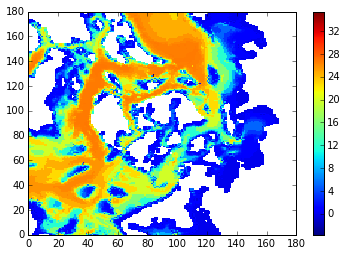

In [6]:
# read in new bathymetry
nc_filepath3 = '../../NEMO-forcing/grid/bathy_downonegrid.nc'
bathy = nc.Dataset(nc_filepath3, 'r')
depth = bathy.variables['Bathymetry'][:]
imin = 220-10
imax = 380+10
jmin = 210-10
jmax = 370+10
plt.pcolormesh(depth[imin:imax,jmin:jmax]-old_depth[imin:imax,jmin:jmax])
plt.colorbar()
print depth[imin+20, jmin+20]
print old_salinity[:, imin+20, jmin+20]
print old_salinity[:, 416, 335]
print depth[416, 335], old_depth[416, 335]

[   0.            1.0000006     2.00000572    3.00001717    4.00004387
    5.00009727    6.00020409    7.00041676    8.0008297     9.00164223
   10.00322342   11.0063076    12.01231575   13.02401733   14.04680634
   15.09115791   16.17741776   17.34492874   18.66934204   20.2942276
   22.48572922   25.71478271   30.74504852   38.62646484   50.40898132
   66.55968475   86.61148834  109.51442719  134.21859741  159.96032715
  186.26864624  212.87744141  239.64315796  266.4901123   293.37896729
  320.28942871  347.2109375   374.13812256  401.06829834  427.99987793]
[   1.0000006     2.00000572    3.00001717    4.00004387    5.00009727
    6.00020409    7.00041676    8.0008297     9.00164223   10.00322342
   11.0063076    12.01231575   13.02401733   14.04680634   15.09115791
   16.17741776   17.34492874   18.66934204   20.2942276    22.48572922
   25.71478271   30.74504852   38.62646484   50.40898132   66.55968475
   86.61148834  109.51442719  134.21859741  159.96032715  186.26864624
  212.

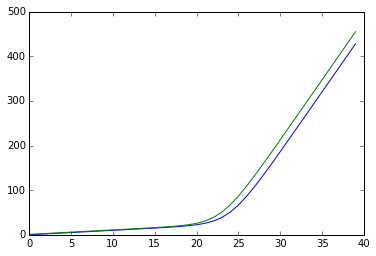

In [7]:
floor = np.empty_like(depths)
ceil = np.empty_like(depths)
ceil[0] = 0.
floor[0] = 2*depths[0]
for k in range(1,40):
    ceil[k] = floor[k-1]
    floor[k] = 2*depths[k] -floor[k-1]
plt.plot(ceil)
plt.plot(floor)
print ceil
print floor

In [8]:
S = np.empty_like(old_salinity)
T = np.empty_like(old_temperature)
# for every cell with top of cell depth < bathymetry, use old TS, if old TS=0, find closest point and use that.
for k in range(40):
    print k
    for j in range(398):
        for i in range(898):
            if ceil[k] < depth[i,j]:
                if old_salinity[k,i,j] <> 0 or old_depth[i,j] == depth[i,j]:
                    S[k,i,j] = old_salinity[k, i, j]
                    T[k,i,j] = old_temperature[k, i, j]
                else:
                    # closest neighbour thing
                    masked_array = np.ma.array(old_salinity[k], mask = old_salinity[k] == 0)
                    X, Y = tidetools.find_closest_model_point(lon[i,j], lat[i,j], lon, lat, masked_array,
                                                             lon_tol=0.01, lat_tol= 0.003)
                    S[k, i, j] = old_salinity[k, X, Y]
                    T[k, i, j] = old_temperature[k, X, Y]

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39


KeyboardInterrupt: 

In [9]:
for k in range(40):
    print k
    for j in range(398):
        for i in range(898):
            if ceil[k] < depth[i,j]:
                if not (S[k,i,j] > 0):
                    print i, j
                    if old_salinity[k,i,j] <> 0 or old_depth[i,j] == depth[i,j]:
                        S[k,i,j] = old_salinity[k, i, j]
                        T[k,i,j] = old_temperature[k, i, j]
                    else:
                        # closest neighbour thing
                        masked_array = np.ma.array(old_salinity[k], mask = old_salinity[k] == 0)
                        X, Y = tidetools.find_closest_model_point(lon[i,j], lat[i,j], lon, lat, masked_array,
                                                             lon_tol=0.01, lat_tol= 0.003)
                        S[k, i, j] = old_salinity[k, X, Y]
                        T[k, i, j] = old_temperature[k, X, Y]

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
406 0
407 0
408 0
410 0
411 0
412 0
413 0
405 1
406 1
407 1
408 1
410 1
411 1
412 1
413 1
405 2
406 2
411 2
412 2
413 2
404 3
405 3
411 3
412 3
403 4
404 4
405 4
411 4
403 5
404 5
403 6
404 6
403 7
404 7
403 8
404 8
402 9
403 9
402 10
400 11
401 11
402 11
399 12
400 12
401 12
399 13
400 13
398 14
399 14
397 15
398 15
397 16
398 16
101 251
101 252
103 253
104 253
105 253
106 253
35
897 40
896 41
897 41
895 42
896 42
897 42
895 43
896 43
897 43
895 44
896 44
897 44
894 45
895 45
896 45
894 46
895 46
893 47
894 47
892 48
893 48
891 49
892 49
891 50
892 50
891 51
36
897 41
896 42
897 42
896 43
895 44
37
345 249
346 249
347 249
345 250
346 250
347 250
345 251
38
345 250
39
757 175
757 176
757 177
758 177
757 178
758 178
758 179
759 179
760 179
762 179
763 179
766 179
767 179
760 180
764 180
765 180
768 180
769 180
796 180
797 180
798 180
799 180
769 181
770 181
771 181
796 181
797 181
798 181
799 

<matplotlib.colorbar.Colorbar instance at 0x7f43e1d1b8c0>

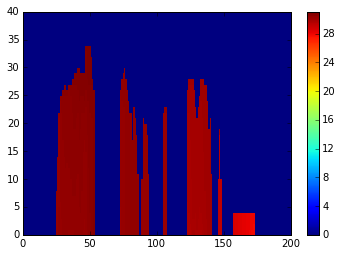

In [10]:
plt.pcolormesh(S[:, imin+100, jmin-10:jmax+10])
plt.colorbar()

In [11]:
print lat[20,40]

47.0107


In [12]:
# build nc file
new_TS = nc.Dataset('TSforDeepenByGridThickness.nc', 'w')
nc_tools.init_dataset_attrs(
    new_TS, 
    title='Salinity Temperature Initial Conditions based on TSApri file', 
    notebook_name='Find TS for new Bathymetry', 
    nc_filepath='../../../nemo-forcing/initial_strat/TSforDeepenByGridThickness.nc',
    comment='Salinity and Temperature conditions from TSApri file for Deepen By Grid Thickness')
new_TS.createDimension('y', 898)
new_TS.createDimension('x', 398)
new_TS.createDimension('deptht',size = len(depths))
new_TS.createDimension('time_counter', None)
nc_tools.show_dimensions(new_TS)
# variables
nav_lat = new_TS.createVariable('nav_lat', 'float32', ('y','x'))
nav_lat.long_name = 'Latitude'
nav_lat.units = 'degrees_north'
nav_lat = lat
nav_lon = new_TS.createVariable('nav_lon', 'float32', ('y','x'))
nav_lon.long_name = 'Longitude'
nav_lon.units = 'degrees_east'
nav_lon = lon
deptht = new_TS.createVariable('deptht', 'float32', ('deptht'))
deptht.long_name = 'Depth'
deptht.units = 'm'
deptht.positive = 'down'
deptht.valid_range = np.array((4., 428.))
deptht = depths
time_counter = new_TS.createVariable('time_counter', 'float32', ('time_counter'))
time_counter.units = 'seconds since 2015-05-10 0:00:00'
time_counter.long_name = 'Time axis'
vosaline = new_TS.createVariable('vosaline', 'float32', 
                               ('time_counter','deptht','y','x'))
vosaline.units = 'none'
vosaline.long_name = 'Practical Salinity'  
vosaline.coordinates = 'nav_lon nav_lat deptht time_counter'
vosaline.grid = 'SalishSea2, Blast Fraser'
vosaline[0] = S
votemper = new_TS.createVariable('votemper', 'float32', 
                               ('time_counter','deptht','y','x'))
votemper.units = 'degC'
votemper.long_name = 'Temperature' 
votemper.coordinates = 'nav_lon nav_lat deptht time_counter'
votemper[0] = T
new_TS.history = """[2015-12-27] Created"""

file format: NETCDF4
Conventions: CF-1.6
title: Salinity Temperature Initial Conditions based on TSApri file
institution: Dept of Earth, Ocean & Atmospheric Sciences, University of British Columbia
source: https://bitbucket.org/salishsea/tools/src/tip/Find TS for new Bathymetry.ipynb
references: REQUIRED
history: [2015-12-27 14:57:34] Created netCDF4 zlib=True dataset.
comment: Salinity and Temperature conditions from TSApri file for Deepen By Grid Thickness
<type 'netCDF4.Dimension'>: name = 'y', size = 898

<type 'netCDF4.Dimension'>: name = 'x', size = 398

<type 'netCDF4.Dimension'>: name = 'deptht', size = 40

<type 'netCDF4.Dimension'> (unlimited): name = 'time_counter', size = 0



(1, 40, 898, 398)


<matplotlib.colorbar.Colorbar instance at 0x7f43e1b3d1b8>

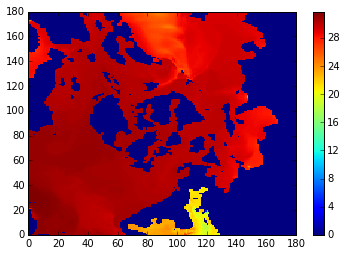

In [13]:
print votemper[:].shape
plt.pcolormesh(vosaline[0,3,imin:imax,jmin:jmax])
plt.colorbar()

<matplotlib.colorbar.Colorbar instance at 0x7ff1ceb13cb0>

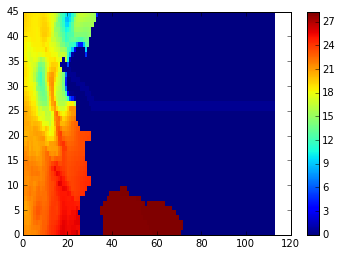

In [16]:
# for fixing river

ik = 425; jk = 302; d = 0.5
vosaline[0,0:6,ik,jk+1] = d
vosaline[0,0:6,ik-1,jk:jk+3] = d
vosaline[0,0:6,ik-2,jk+1:jk+5] = d
vosaline[0,0:6,ik-3,jk+3:jk+7] = d
vosaline[0,0:6,ik-4,jk+5:jk+9] = d
vosaline[0,0:6,ik-5,jk+7:jk+11] = d
vosaline[0,0:6,ik-6,jk+9:jk+13] = d
vosaline[0,0:6,ik-7,jk+11:jk+14] = d
vosaline[0,0:6,ik-8,jk+12:jk+15] = d
vosaline[0,0:6,ik-9,jk+13:] = d
vosaline[0,0:6,ik-10,jk+14:] = d
plt.pcolormesh(vosaline[0,3,imin:imax,jmin:jmax])
plt.colorbar()

In [17]:
new_TS.close()